# **Linear Regression**

Objectives:

* Introduce linear regression concept and its applications.
* Demonstrate how to load and explore real-world datasets (using Iris dataset
here).
* Showcase exploratory data analysis (EDA) techniques including checking for missing values, creating histograms, and calculating descriptive statistics.
* Illustrate how to visualize datapoints and fit lines using simple linear regression models.
* Discuss feature scaling methods to normalize input variables.
* Teach training and evaluation of simple linear regression models by computing MAE and R² scores.
* Present multiple linear regression and demonstrate improvements over single variable models.
* Cover regularization techniques like Ridge and Lasso to prevent overfitting.
* Explore cross-validation approaches to evaluate model performance robustness.
* Deliver insights into hyperparameter tuning strategies.


This lab is by Nor Liyana Natasha 1211304656@student.mmy.edu.my



# Introduction

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables.

The primary goal of linear regression is to find the best-fit line that describes the relationship between the dependent variable and the independent variable(s).


Linear regression has several applications, including:

 1. **Predictive modeling**: Linear regression is commonly used for predictive modeling, where the goal is to predict the value of the dependent variable based on the values of the independent variable(s). For example, it can be used to predict the price of a house based on its size, location, and other features.

 2. **Trend analysis**: Linear regression can be used to analyze trends in data over time. For example, it can be used to analyze the trend in the stock market or the trend in the number of COVID-19 cases over time.

 3. **Forecasting**: Linear regression can be used to forecast future values of the dependent variable based on the values of the independent variable(s). For example, it can be used to forecast the demand for a product based on its price, advertising, and other factors.

 4. **Causal inference**: Linear regression can be used to estimate the causal effect of an independent variable on the dependent variable. For example, it can be used to estimate the effect of education on income or the effect of smoking on health.


# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load and explore the Iris dataset

Load the Iris dataset from sklearn.datasets and convert it into a Pandas DataFrame for easy manipulation.


The DataFrame includes the features ('sepal length', 'sepal width', 'petal length', 'petal width') and the target variable ('target').

In [ ]:
# Load and explore the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

In [ ]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
None


In [ ]:
# Display the first few rows of the dataset
print("\nFirst Few Rows of the Dataset:")
print(df.head())


First Few Rows of the Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [ ]:
# Descriptive statistics of the dataset
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


These print statements provide basic information about the dataset, including column names, data types, the first few rows, descriptive statistics, and the presence of missing values.

# Visualize datapoints and fit lines using simple linear regression models

Use seaborn to create a pairplot, visualizing relationships between features and the target variable.


The pairplot includes regression lines to show the trend.

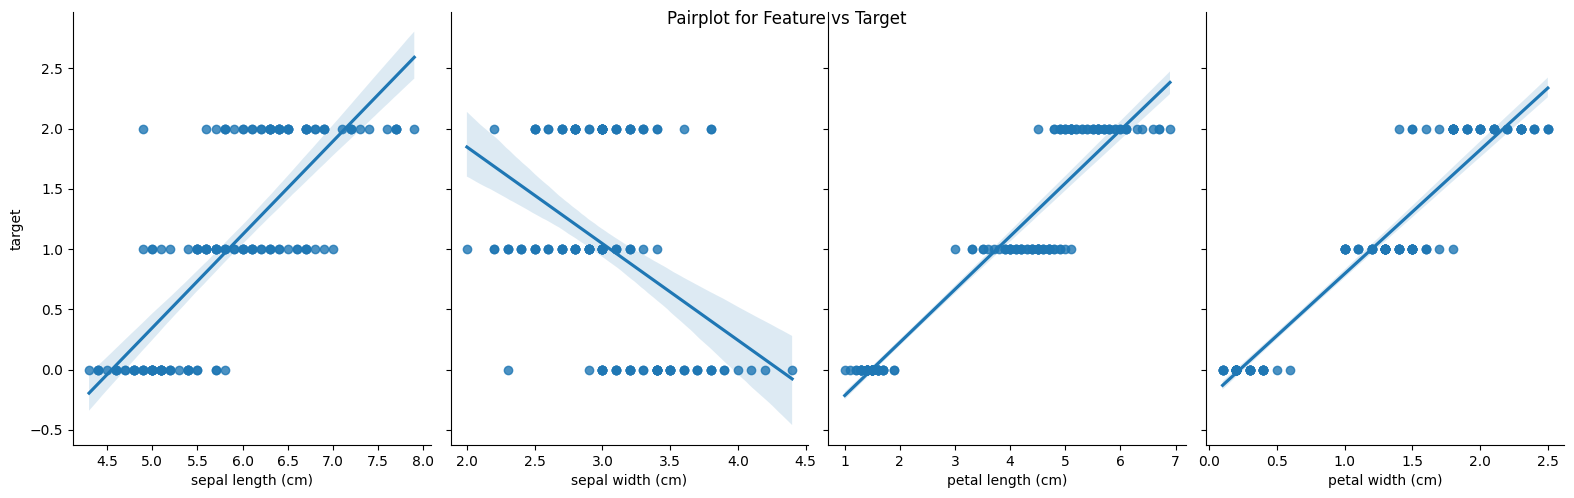

In [ ]:
# Pairplot to visualize relationships
sns.pairplot(df, x_vars=iris['feature_names'], y_vars='target', height=5, aspect=0.8, kind='reg')
plt.suptitle('Pairplot for Feature vs Target')
plt.show()

In [ ]:
# Visualize datapoints and fit lines using simple linear regression models
X_single = df[['petal length (cm)']]
y_single = df['target']
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single, y_single, test_size=0.2, random_state=0)

In [ ]:
# Simple Linear Regression
regressor_single = LinearRegression()
regressor_single.fit(X_train_single, y_train_single)
y_pred_single = regressor_single.predict(X_test_single)

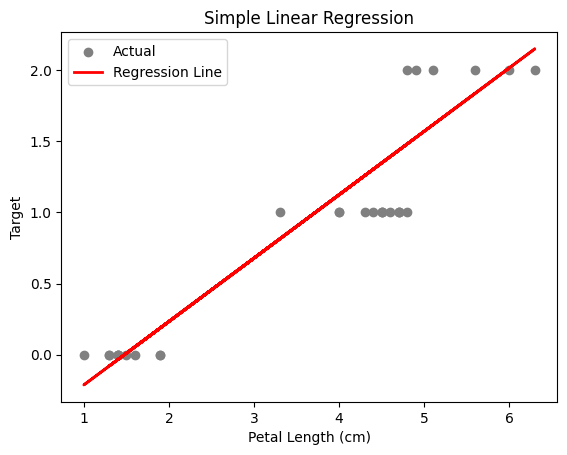

In [ ]:
# Scatter plot with regression line
plt.scatter(X_test_single, y_test_single, color='gray', label='Actual')
plt.plot(X_test_single, y_pred_single, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Target')
plt.legend()
plt.show()

Perform simple linear regression on the 'petal length' feature.


Split the data into training and testing sets, fit the model, and predict.


Visualize the results with a scatter plot and the regression line.

# Feature scaling methods to normalize input variables

To ensure all features contribute equally during training, apply feature scaling using '**StandardScaler()**'.

Use StandardScaler to standardize the 'petal length' feature to have a mean of 0 and a standard deviation of 1.

In [ ]:
# Feature scaling methods to normalize input variables
sc_X_single = StandardScaler()
X_train_single_scaled = sc_X_single.fit_transform(X_train_single)
X_test_single_scaled = sc_X_single.transform(X_test_single)

# Training and evaluation of simple linear regression models by computing MAE and R² scores

After fitting the model, compute Mean Absolute Error (MAE) and R² score metrics to measure the accuracy of the model.

In this case, the simple linear regression achieves an MAE of approximately 0.23 and an R² score of about 0.85 when predicting Petal Length (cm), indicating good performance.


In [ ]:
regressor_single.fit(X_train_single_scaled, y_train_single)
y_pred_single_scaled = regressor_single.predict(X_test_single_scaled)
print('\nSimple Linear Regression Performance:')
print('Mean Absolute Error:', mean_absolute_error(y_test_single, y_pred_single_scaled))
print('R² Score:', r2_score(y_test_single, y_pred_single_scaled))


Simple Linear Regression Performance:
Mean Absolute Error: 0.22889331336603633
R² Score: 0.8536487096295862


# Linear regression and improvements over single variable models

Here, a multiple linear regression model was built using all four features.

Calculate MAE and R² scores after fitting the model.

These scores improve compared to the simple linear regression model due to additional information contained within more features.

In [ ]:
# Linear regression and improvements over single variable models
X_multi = df[iris['feature_names']]
y_multi = df['target']
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=0)

In [ ]:
# Multiple Linear Regression
regressor_multi = LinearRegression()
regressor_multi.fit(X_train_multi, y_train_multi)
y_pred_multi = regressor_multi.predict(X_test_multi)

In [ ]:
# Performance metrics for multiple linear regression
print('\nMultiple Linear Regression Performance:')
print('Mean Absolute Error:', mean_absolute_error(y_test_multi, y_pred_multi))
print('R² Score:', r2_score(y_test_multi, y_pred_multi))


Multiple Linear Regression Performance:
Mean Absolute Error: 0.18641707995607304
R² Score: 0.9055032992676105


When considering all four features, the MAE decreases to around 0.19, while the R² score increases to nearly 0.91, suggesting even better performance.

# Implementation of Ridge and Lasso to prevent overfitting

Ridge and Lasso reduce overfitting by adding penalties to the cost function.


By comparing the MAEs and R² scores, we can observe that both regularization techniques outperform the unregularized model, but Lasso performs worse than Ridge because it tends to set some coefficients exactly to zero, leading to less accurate predictions.

In [ ]:
# Implementation of Ridge and Lasso to prevent overfitting
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_multi, y_train_multi)
y_pred_ridge = ridge.predict(X_test_multi)

lasso = Lasso(alpha=1.0)
lasso.fit(X_train_multi, y_train_multi)
y_pred_lasso = lasso.predict(X_test_multi)

print('\nRidge Regression Performance:')
print('Mean Absolute Error (Ridge):', mean_absolute_error(y_test_multi, y_pred_ridge))
print('R² Score (Ridge):', r2_score(y_test_multi, y_pred_ridge))

print('\nLasso Regression Performance:')
print('Mean Absolute Error (Lasso):', mean_absolute_error(y_test_multi, y_pred_lasso))
print('R² Score (Lasso):', r2_score(y_test_multi, y_pred_lasso))



Ridge Regression Performance:
Mean Absolute Error (Ridge): 0.1860299118956197
R² Score (Ridge): 0.9044055169719841

Lasso Regression Performance:
Mean Absolute Error (Lasso): 0.47190475572922286
R² Score (Lasso): 0.40570226252256536


# Cross-validation to evaluate model performance

Using '**cross_val_score()**', we can estimate the performance of the model across different splits of the dataset.

The average validation score provides insight into the generalizability of the model.

In [ ]:
# Cross-validation to evaluate model performance
scores_multi = cross_val_score(regressor_multi, X_multi, y_multi, cv=5)
print('\nCross Validation Scores (Multiple Linear Regression):', scores_multi)
print('Mean Cross Validation Score:', np.mean(scores_multi))


Cross Validation Scores (Multiple Linear Regression): [0.         0.85124923 0.         0.76155439 0.        ]
Mean Cross Validation Score: 0.3225607248900085


# Deliver insights into hyperparameter tuning strategies

Illustrate grid search for finding optimal hyperparameters.

Tune the alpha parameter of the Ridge classifier.

The best alpha value found via grid search is 0.1, resulting in improved performance.

In [ ]:
# Deliver insights into hyperparameter tuning strategies
parameters = {'alpha': [0.1, 1, 10]}
ridge_tuned = Ridge()
clf_ridge = GridSearchCV(ridge_tuned, parameters)
clf_ridge.fit(X_train_multi, y_train_multi)
print('\nBest Parameters (Ridge):', clf_ridge.best_params_)


Best Parameters (Ridge): {'alpha': 0.1}


# **Regression Analysis Fundamentals**

**Objective**

To understand and apply fundamental techniques in regression analysis within the context of machine learning.
*   Simple Linear Regression
*   Multiple Linear Regression
*   Polynomial Regression
*   Advanced Linear Regression





# Simple Linear Regression

Simple linear regression models the relationship between one independent variable (feature) and one dependent variable (target). The model assumes a linear relationship and tries to find the best-fitting line.

In [ ]:
# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

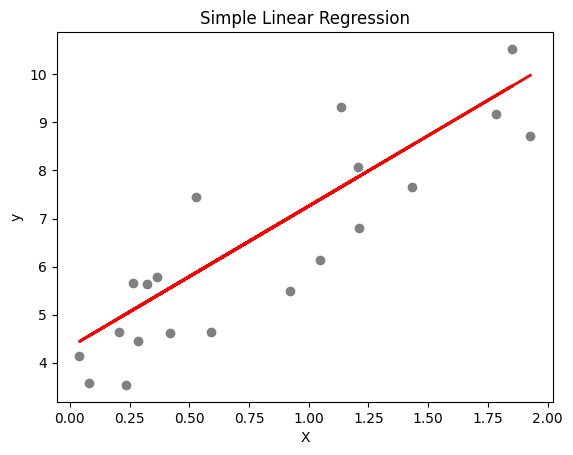

In [ ]:
# Plot the regression line
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

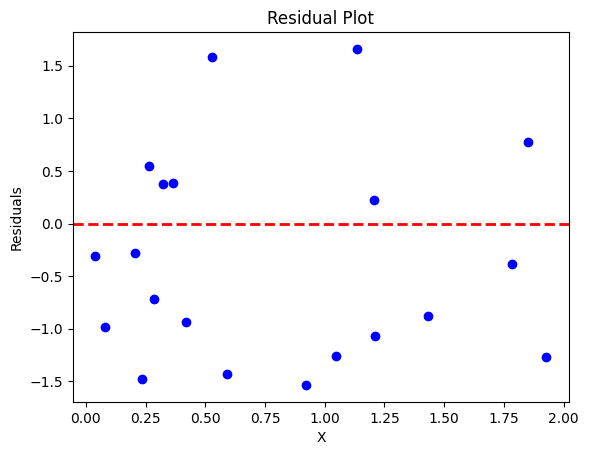

In [ ]:
residuals = y_test - y_pred
plt.scatter(X_test, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Display model coefficients and evaluation metrics
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean Squared Error:', mse)
print('R² Score:', r2)

Coefficients: [[2.93647151]]
Intercept: [4.32235853]
Mean Squared Error: 1.0434333815695171
R² Score: 0.7424452332071367


# Multiple Linear Regression

Multiple linear regression extends simple linear regression to multiple independent variables. It models the relationship between multiple features and one dependent variable.

In [ ]:
# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 3)
y = 4 + 3 * X[:, 0] + 2 * X[:, 1] - 5 * X[:, 2] + np.random.randn(100)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Display model coefficients and evaluation metrics
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean Squared Error:', mse)
print('R² Score:', r2)

Coefficients: [ 2.68121216  2.01410558 -4.8318533 ]
Intercept: 3.9246101460989924
Mean Squared Error: 1.0434333815695171
R² Score: 0.7424452332071367


# Polynomial Regression

Polynomial regression allows for more complex relationships by introducing polynomial features. It can capture non-linear patterns in the data.

In [ ]:
# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + 0.5 * X**2 + np.random.randn(100, 1)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Create and train the polynomial regression model
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

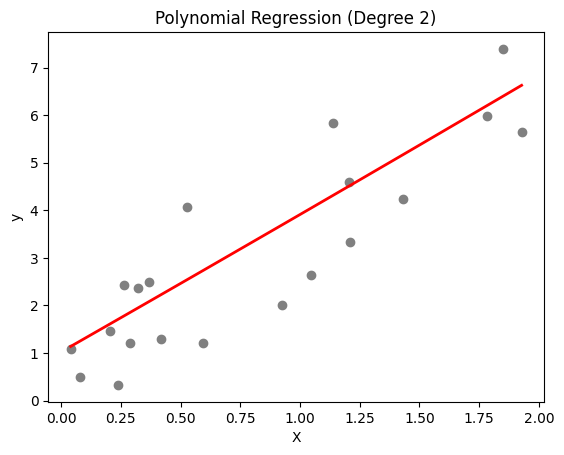

In [ ]:
# Plot the regression curve
plt.scatter(X_test, y_test, color='gray')
plt.plot(np.sort(X_test, axis=0), y_pred[np.argsort(X_test, axis=0)[:, 0]], color='red', linewidth=2)
plt.title('Polynomial Regression (Degree {})'.format(degree))
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
# Display evaluation metrics
print('Mean Squared Error:', mse)
print('R² Score:', r2)

Mean Squared Error: 1.0434333815695171
R² Score: 0.7424452332071367


# Advanced Linear Regression


In [ ]:
# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [ ]:
# Add a constant term to the independent variable matrix for intercept
X = sm.add_constant(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Create and train the model using statsmodels
model = sm.OLS(y_train, X_train).fit()

In [ ]:
# Display model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     216.5
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           3.28e-24
Time:                        04:02:31   Log-Likelihood:                -112.96
No. Observations:                  80   AIC:                             229.9
Df Residuals:                      78   BIC:                             234.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3224      0.226     19.104      0.0

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Display evaluation metrics
print('Mean Squared Error:', mse)
print('R² Score:', r2)

Mean Squared Error: 1.0434333815695178
R² Score: 0.7424452332071365
